In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.pylab as pla
import pandas as pd
from scipy import fftpack

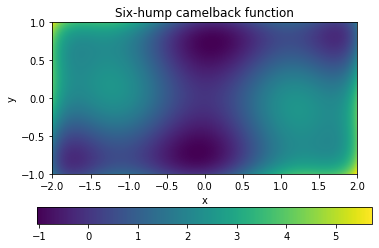

Number of global minima found:  2
Position of the minimas:  [ 0.08984283 -0.71265717] [-0.08984284  0.71265716]
Function values:  -1.03162845 -1.03162845
Minimization success:  True True
Obtained min with starting point (0,0):  0.0
Check correctness of min:  False


In [9]:
#EX1

def f(x,y):
    return (4-2.1*x**2+(x**4)/3)*x**2 + x*y + (4*y**2 -4)*y**2


x = np.linspace(start=-2, stop=2, num=1000)
y = np.linspace(start=-1, stop=1, num=500)

xv, yv = np.meshgrid(x, y)


pla.imshow(f(xv,yv), extent=(-2,2,-1,1))
pla.colorbar(orientation='horizontal')
pla.xlabel('x')
pla.ylabel('y')
pla.title('Six-hump camelback function')
pla.show()


def fun(k):
    x = k[0]
    y = k[1]
    return (4-2.1*x**2+(x**4)/3)*x**2 + x*y + (4*y**2 -4)*y**2


step = 0.5
starting_points = np.meshgrid(np.arange(-2+step, 2, step), np.arange(-1+step, 1, step))

p = [[starting_points[0][i][j],(starting_points[1][i][j])] for i in range(np.size(starting_points[0], axis=0)) for j in range(np.size(starting_points[0], axis=1)) ]

solutions = [optimize.minimize(fun, x, bounds=[(x[0]-step/2,x[0]+step/2),(x[1]-step/2,x[1]+step/2)]) for x in p]

computed_mins = np.round(np.array([solution['fun'] for solution in solutions]), decimals = 8)
idxs = np.where(computed_mins == computed_mins.min())[0]
solution = [solutions[i] for i in idxs]

print('Number of global minima found: ', len(idxs))
print('Position of the minimas: ', solution[0]['x'],solution[1]['x'])
print('Function values: ', np.round(solution[0]['fun'], decimals = 8), np.round(solution[1]['fun'], decimals = 8))
print('Minimization success: ', solution[0]['success'],solution[1]['success'])


sol = optimize.minimize(fun, (0,0))

print('Obtained min with starting point (0,0): ', sol['fun'])
print('Check correctness of min: ', np.allclose(np.round(solution[0]['fun'], decimals = 8),  sol['fun']))

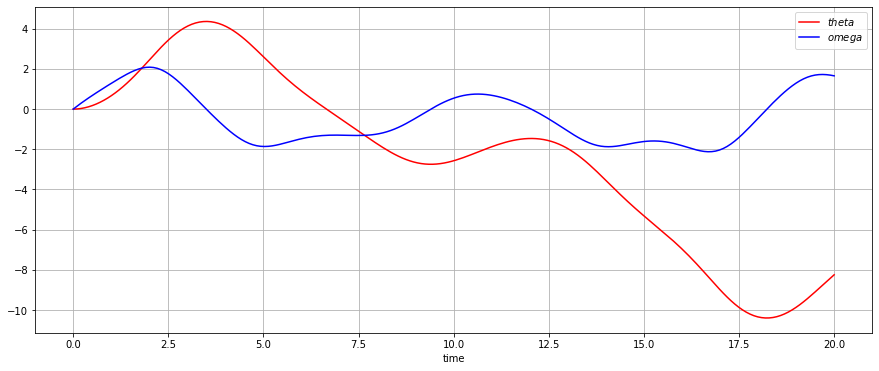

In [10]:
#EX2

Q = 2.0
d = 1.5
w = 0.65

def function(y, time, Q, w ,d):
    a = (1/Q)*-1
    theta, omega = y
    return (omega, (a*omega)+np.sin(theta)+d*np.cos(w*time))

t = np.linspace(0, 20, 200)
X = odeint(function, (0.0, 0.0), t, args=(Q,w,d))

plt.figure(figsize=(15, 6))
plt.plot(t, X[:, 0], 'r', label="$theta$")
plt.plot(t, X[:, 1], 'blue', label="$omega$")
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

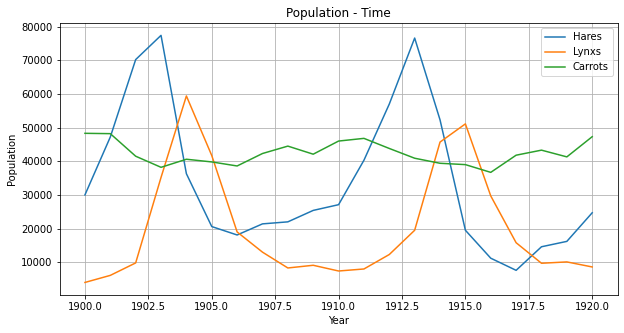

<Figure size 432x288 with 0 Axes>

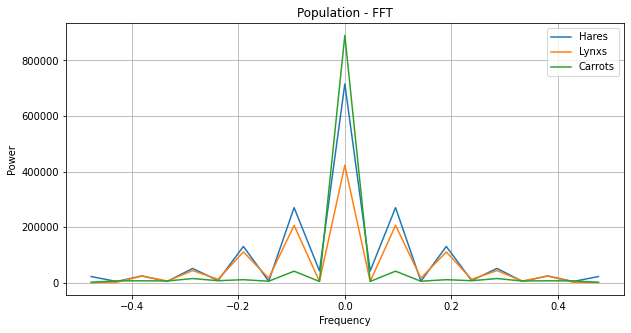

In [19]:
#EX3

animals_data = np.loadtxt('./data/populations.txt')
years = animals_data[:,0]
hares = animals_data[:,1]
lynxs = animals_data[:,2]
carrots = animals_data[:,3]

plt.figure()
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(years, hares , label = 'Hares') 
ax1.plot(years, lynxs , label = 'Lynxs') 
ax1.plot(years, carrots , label = 'Carrots') 

ax1.set_title('Population - Time')
ax1.set_ylabel('Population')
ax1.set_xlabel('Year')
ax1.grid()
ax1.legend()

time_step = 1

H_hares = fftpack.fft(hares)
pow_hares = np.abs(H_hares)
freq_hares = fftpack.fftfreq(hares.size, d = time_step)
sorted_f1 = sorted(freq_hares)

H_lynxs = fftpack.fft(lynxs)
pow_lynxes = np.abs(H_lynxs)
freq_lynxs = fftpack.fftfreq(lynxs.size, d = time_step)
sorted_f2 = sorted(freq_lynxs)

H_carrots = fftpack.fft(carrots)
pow_carrots = np.abs(H_carrots)
freq_carrots = fftpack.fftfreq(carrots.size, d = time_step)
sorted_f3 = sorted(freq_carrots)

pow_hares = pow_hares[np.argsort(np.array(freq_hares))]
pow_lynxes = pow_lynxes[np.argsort(np.array(freq_lynxs))]
pow_carrots = pow_carrots[np.argsort(np.array(freq_carrots))]

plt.figure()
fig, ax2 = plt.subplots(figsize = (10, 5))
ax2.plot(sorted(freq_hares), pow_hares, label='Hares')
ax2.plot(sorted(freq_lynxs), pow_lynxes, label='Lynxs')
ax2.plot(sorted(freq_carrots), pow_carrots, label='Carrots')
ax2.set_title('Population - FFT')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')
ax2.legend()
ax2.grid()

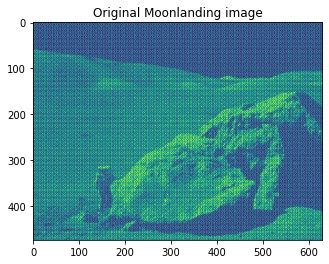

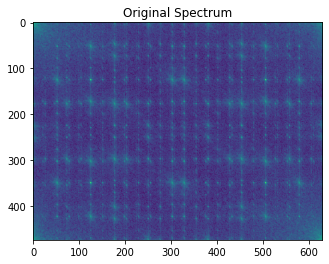

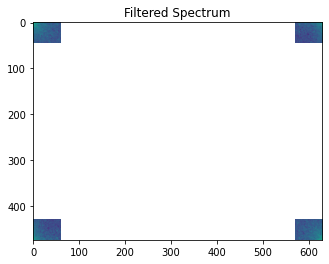

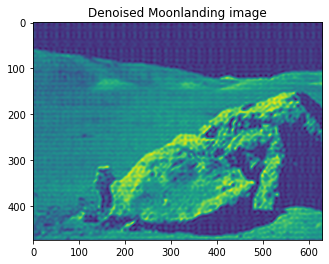

In [22]:
#EX4

from matplotlib.colors import LogNorm

img = plt.imread("images/moonlanding.png")
plt.imshow(img)
plt.title('Original Moonlanding image')
plt.show()

imgFFT = fftpack.fft2(img)

plt.imshow(np.abs(imgFFT), norm=LogNorm(vmin=5))
plt.title('Original Spectrum')
plt.show()  

keep_fraction = 0.1

imageFFT_denoised = imgFFT.copy()


r, c = imageFFT_denoised.shape


imageFFT_denoised[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0


imageFFT_denoised[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.imshow(np.abs(imageFFT_denoised), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')
plt.show()


image_new = fftpack.ifft2(imageFFT_denoised).real

plt.imshow(image_new)
plt.title('Denoised Moonlanding image')
plt.show()
